https://www.kaggle.com/datasets/mitul1999/diabetes-symptom-data-history-is-given

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'Diabetes_Data_for_10_000_Individuals.csv')

In [3]:
df.head()

,Age,Gender,BMI,BloodPressure,Cholesterol,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,64,Female,19.8,150,237,254.2,146,1.72,1
1,67,Male,21.2,147,278,130.5,101,2.03,0
2,73,Female,19.3,80,198,128.7,185,0.74,1
3,20,Male,33.4,91,235,51.1,128,0.99,1
4,23,Male,27.7,148,292,114.1,74,0.69,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
labelencode = LabelEncoder()
df['Gender'] = labelencode.fit_transform(df['Gender'])

In [4]:
len(df)

10000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Gender                    10000 non-null  int32  
 2   BMI                       10000 non-null  float64
 3   BloodPressure             10000 non-null  int64  
 4   Cholesterol               10000 non-null  int64  
 5   Insulin                   10000 non-null  float64
 6   Glucose                   10000 non-null  int64  
 7   DiabetesPedigreeFunction  10000 non-null  float64
 8   Outcome                   10000 non-null  int64  
dtypes: float64(3), int32(1), int64(5)
memory usage: 664.2 KB


In [10]:
df.describe()

,Age,Gender,BMI,BloodPressure,Cholesterol,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.470500,0.502600,29.196510,129.769300,224.084400,145.271090,134.102000,1.294811,0.504800
std,17.308665,0.500018,6.211557,28.669672,43.242487,75.512274,37.368147,0.689986,0.500002
min,20.000000,0.000000,18.500000,80.000000,150.000000,15.100000,70.000000,0.100000,0.000000
25%,35.000000,0.000000,23.800000,105.000000,187.000000,79.300000,101.000000,0.700000,0.000000
50%,50.000000,1.000000,29.100000,130.000000,224.000000,146.000000,134.000000,1.290000,1.000000
75%,64.000000,1.000000,34.600000,155.000000,261.000000,210.625000,166.000000,1.900000,1.000000
max,79.000000,1.000000,40.000000,179.000000,299.000000,276.000000,199.000000,2.500000,1.000000


In [11]:
df_corr= df.corr()

In [16]:
df_corr

,Age,Gender,BMI,BloodPressure,Cholesterol,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
Age,1.000000,0.012749,-0.016452,0.006699,0.002089,0.012830,0.016610,-0.005809,-0.008934
Gender,0.012749,1.000000,-0.019203,-0.004608,-0.000533,-0.005309,-0.005383,-0.000409,0.010351
BMI,-0.016452,-0.019203,1.000000,-0.007138,0.004022,0.000126,0.000346,-0.018839,0.002506
BloodPressure,0.006699,-0.004608,-0.007138,1.000000,-0.000330,-0.006140,-0.000195,-0.003122,-0.000924
Cholesterol,0.002089,-0.000533,0.004022,-0.000330,1.000000,-0.007791,-0.007162,-0.007354,-0.000014
Insulin,0.012830,-0.005309,0.000126,-0.006140,-0.007791,1.000000,-0.006950,0.008942,0.024613
Glucose,0.016610,-0.005383,0.000346,-0.000195,-0.007162,-0.006950,1.000000,-0.021876,-0.012380
DiabetesPedigreeFunction,-0.005809,-0.000409,-0.018839,-0.003122,-0.007354,0.008942,-0.021876,1.000000,-0.002414
Outcome,-0.008934,0.010351,0.002506,-0.000924,-0.000014,0.024613,-0.012380,-0.002414,1.000000


In [31]:
maskno = (~(df.corr()> 0.005) | (df.corr()< -0.05))
#mask = np.triu(np.ones_like(df_corr, dtype=bool))


<Axes: >

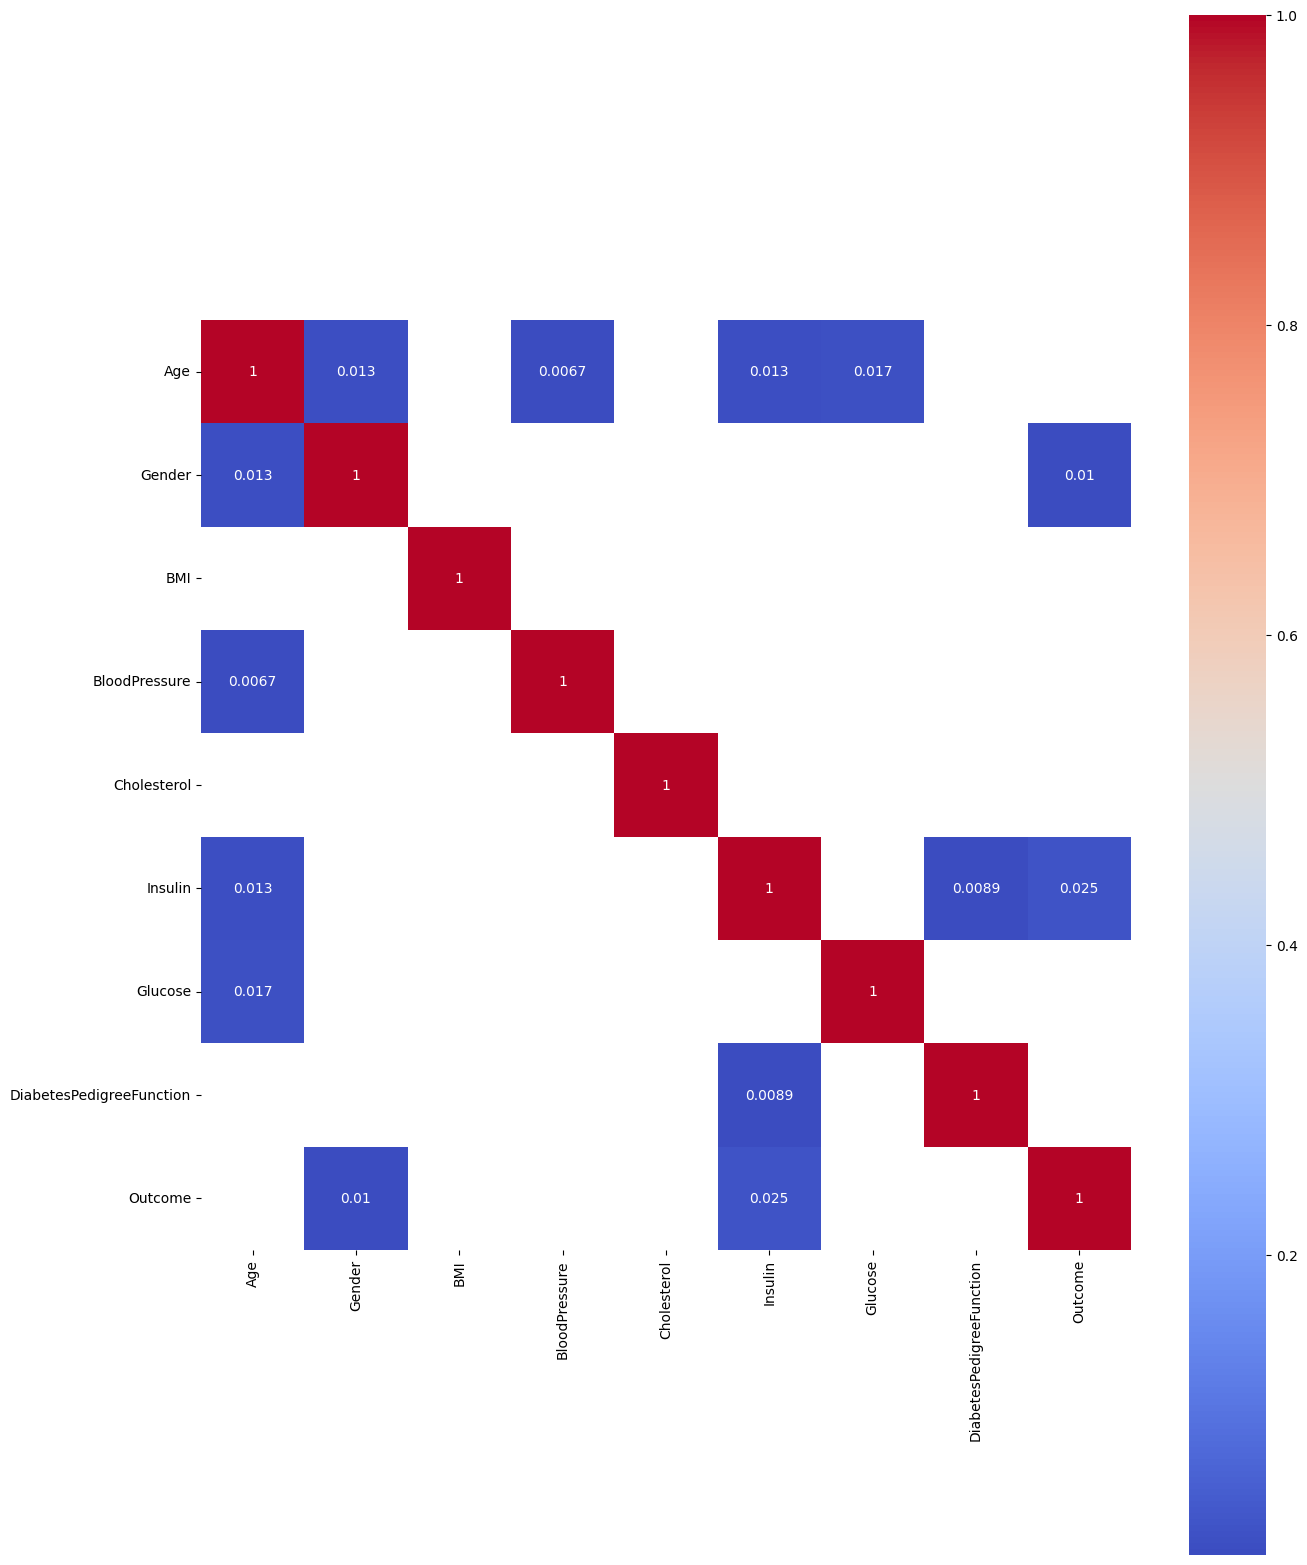

In [32]:
plt.figure(figsize=(15,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=maskno)

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
df_outcome = df[['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']]

In [18]:
df_outcome.head(20)

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
5,5,116,25.6,30,0
6,3,78,31.0,26,1
7,10,115,35.3,29,0
8,2,197,30.5,53,1
9,8,125,0.0,54,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

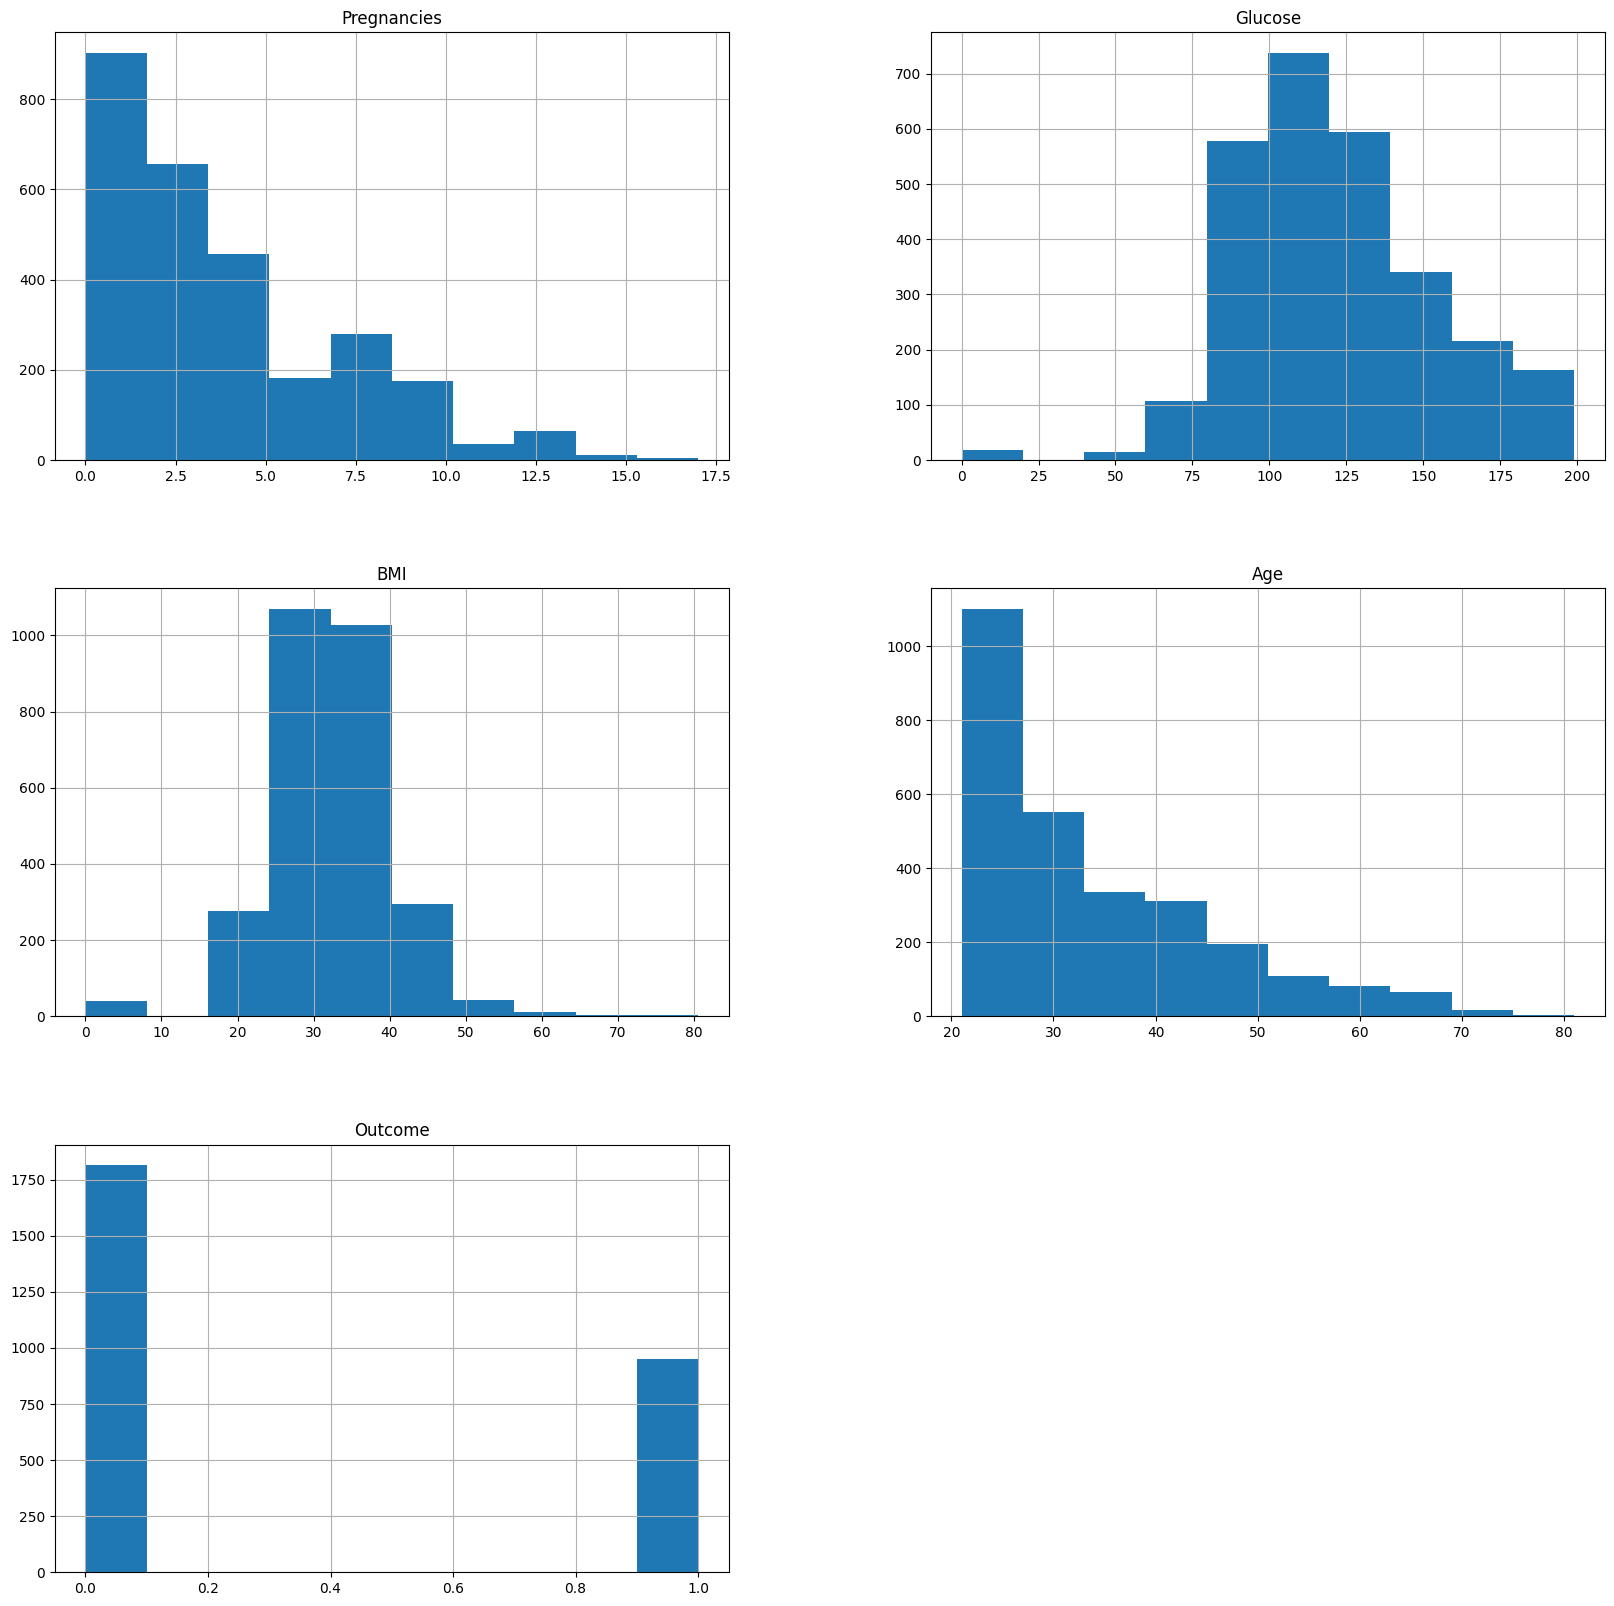

In [19]:
df_outcome.hist(figsize=(20,20))

In [20]:
df_outcome.isnull().sum()

Pregnancies    0
Glucose        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = df_outcome.drop(columns=['Outcome'])
y = df_outcome['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: title={'center': 'Age'}>]],
      dtype=object)

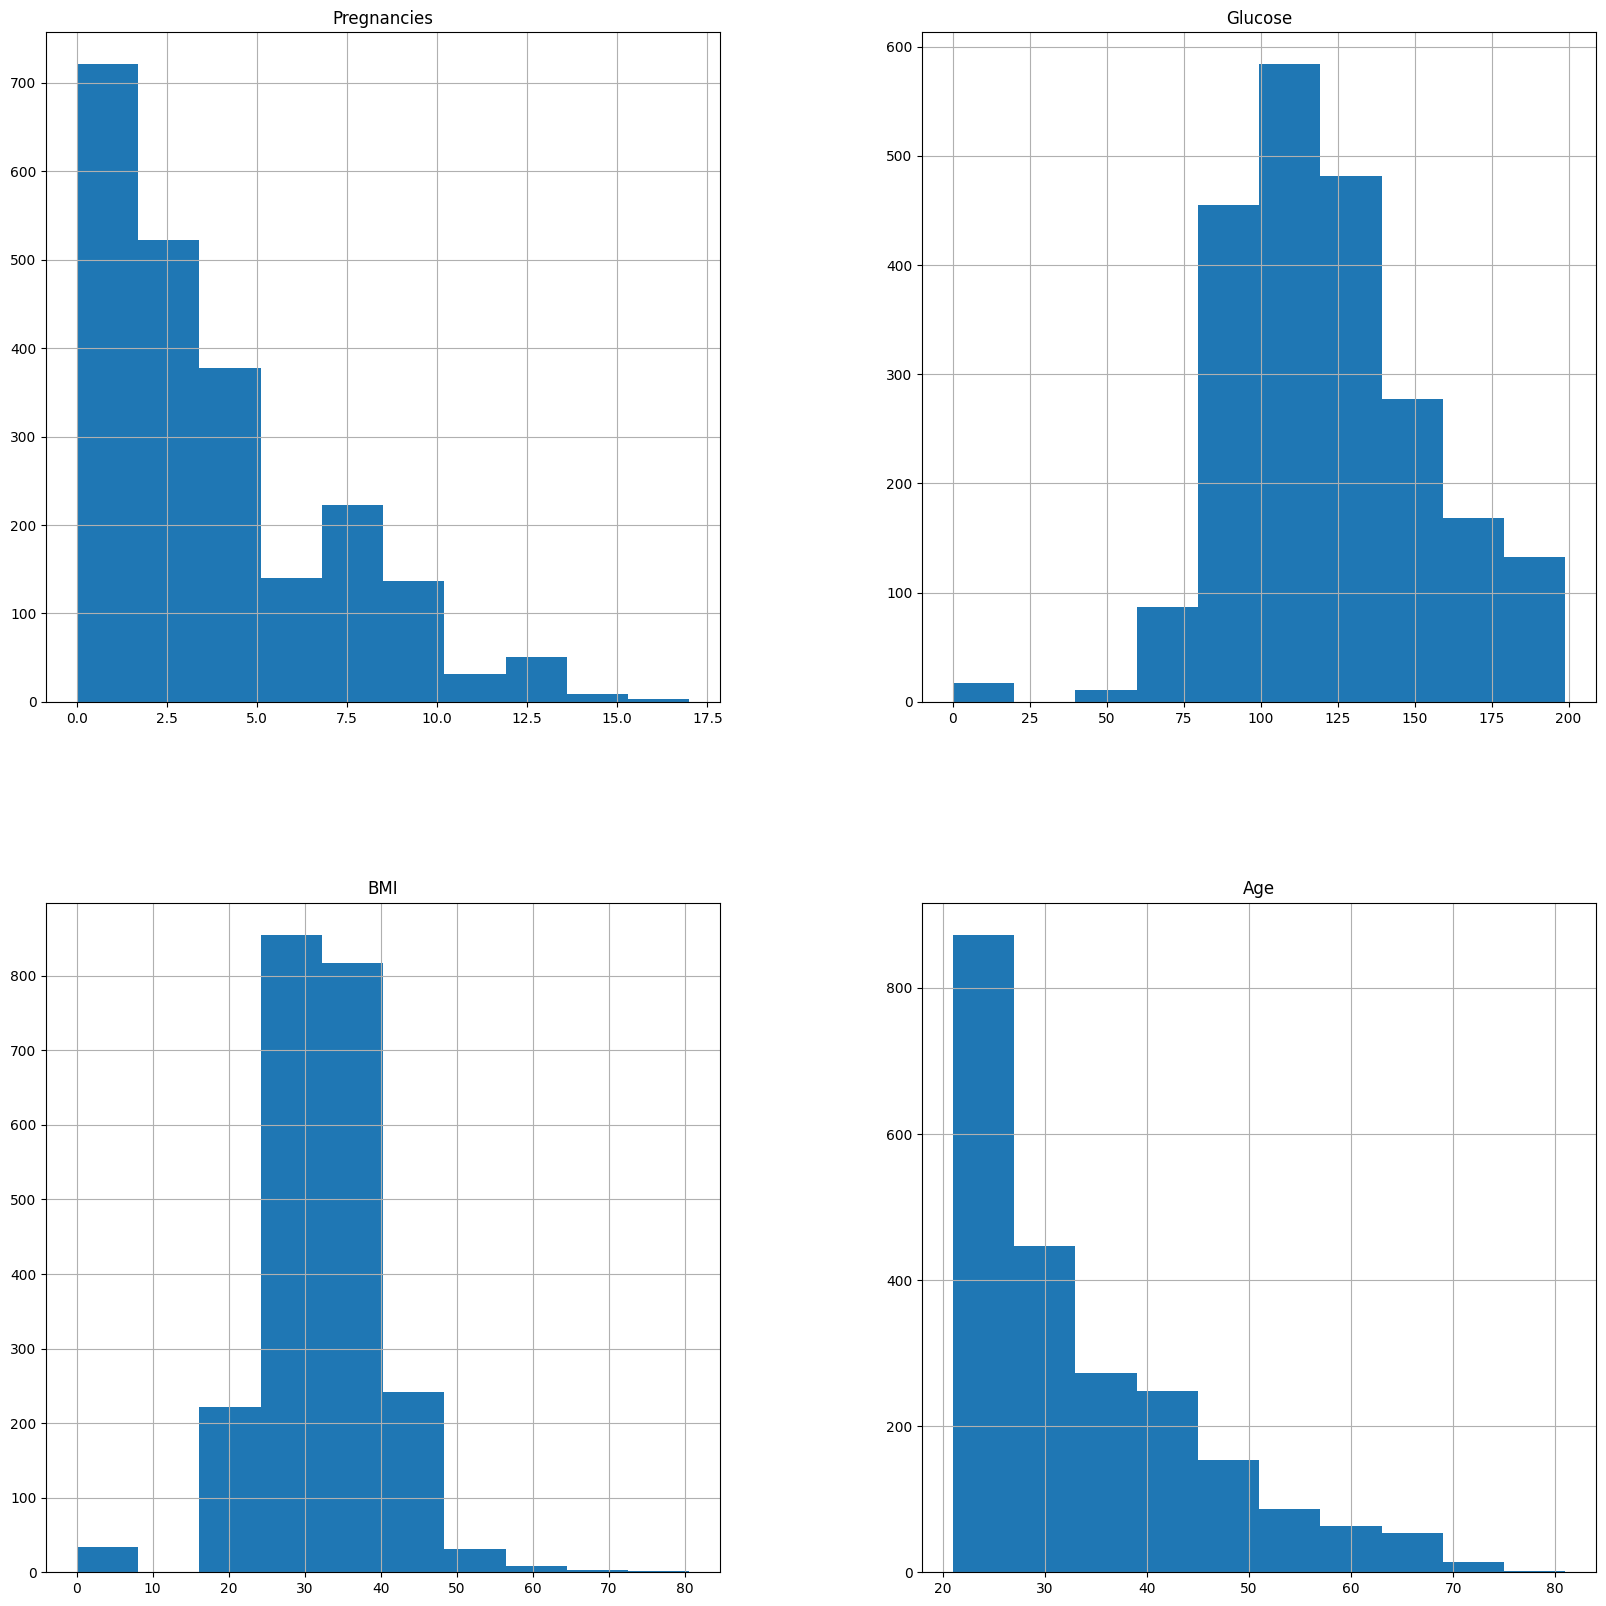

In [25]:
X_train.hist(figsize=(20,20))

In [26]:
y_train.value_counts()

Outcome
0    1453
1     761
Name: count, dtype: int64

In [27]:
pos_index = y_train[y_train.values == 1].index  # Getting the indices of the positive class (where y_train equals 1)
neg_index = y_train[y_train.values == 0].index  # Getting the indices of the negative class (where y_train equals 0)

In [28]:
len(pos_index)

761

In [29]:
len(neg_index)

1453

In [30]:
import random

The code below takes the lenght of positive training labels (pos_index) and the lenght of negative training labels (neg_index), extracts the indexes and then randomly chooses the same number of indexes from the negative training labels. The code then works like a shuffle. 

In [31]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))


In [32]:
X_train = X_train.loc[new_indexes, ]  # Selecting the rows from X_train corresponding to the new balanced indices
y_train = y_train[new_indexes]  # Selecting the values from y_train corresponding to the new balanced indices

In [33]:
X_train.head()

,Pregnancies,Glucose,BMI,Age
2438,4,144,38.5,37
816,7,103,39.1,31
939,6,134,35.4,29
2721,3,170,34.5,30
254,12,92,27.6,44


In [34]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
neighbors_c = np.arange(1,13)
train_accuracy_c = {}
test_accuracy_c = {}

for neighbor in neighbors_c:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled, y_train)

    train_accuracy_c[neighbor]=knn.score(X_train_scaled, y_train)
    test_accuracy_c[neighbor]=knn.score(X_test_scaled, y_test)

print(neighbors_c, '\n', train_accuracy_c, '\n', test_accuracy_c)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9947437582128777, 3: 0.9697766097240473, 4: 0.9415243101182654, 5: 0.9080157687253614, 6: 0.8883048620236531, 7: 0.8672798948751642, 8: 0.8344283837056504, 9: 0.8318002628120894, 10: 0.8324572930354797, 11: 0.8193166885676741, 12: 0.8127463863337714} 
 {1: 0.944043321299639, 2: 0.924187725631769, 3: 0.8610108303249098, 4: 0.8176895306859205, 5: 0.7653429602888087, 6: 0.8032490974729242, 7: 0.7779783393501805, 8: 0.7851985559566786, 9: 0.7581227436823105, 10: 0.7725631768953068, 11: 0.7689530685920578, 12: 0.7725631768953068}


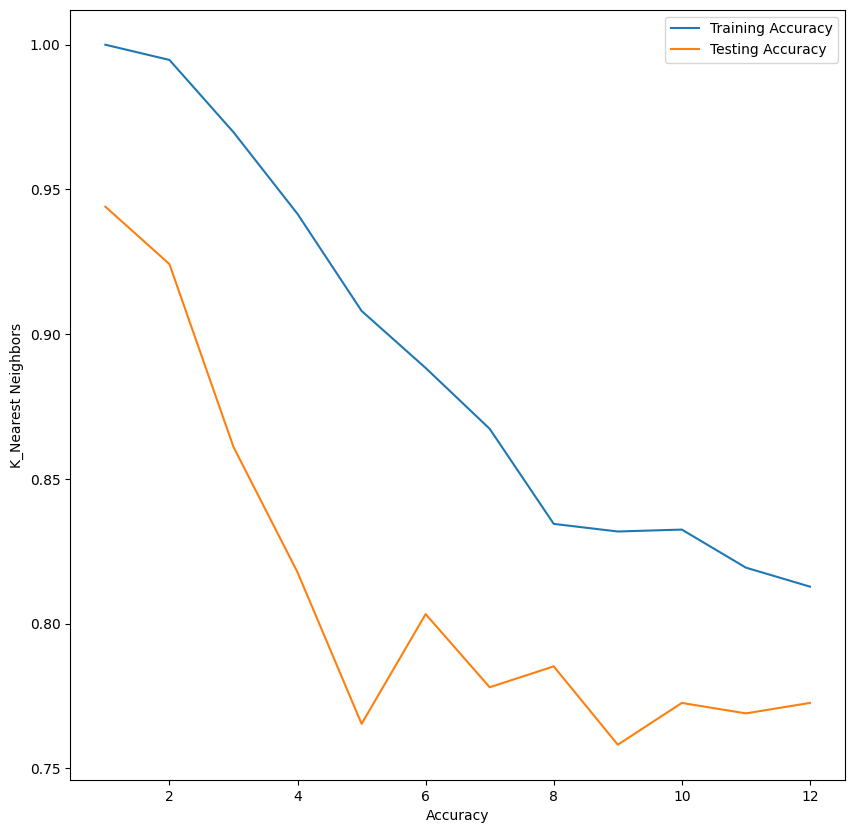

In [36]:
plt.figure(figsize=(10,10))
plt.plot(neighbors_c, list(train_accuracy_c.values()), label = 'Training Accuracy')
plt.plot(neighbors_c, list(test_accuracy_c.values()), label = 'Testing Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('K_Nearest Neighbors')
plt.legend()

In [50]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [51]:
y_knn_pred = knn.predict(X_test)

In [52]:
knn_accuracy = accuracy_score(y_test, y_knn_pred)
knn_c_matrix = confusion_matrix(y_test, y_knn_pred)
knn_class_report = classification_report(y_test, y_knn_pred)

In [53]:
knn.score(X_test,y_test)

0.7888086642599278

In [54]:
print('Accuracy Score: ', knn_accuracy, '\n')
print('Confusion Matrix: \n', knn_c_matrix, '\n')
print('Classification Report: \n', knn_class_report)

Accuracy Score:  0.7888086642599278 

Confusion Matrix: 
 [[294  69]
 [ 48 143]] 

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       363
           1       0.67      0.75      0.71       191

    accuracy                           0.79       554
   macro avg       0.77      0.78      0.77       554
weighted avg       0.80      0.79      0.79       554



In [55]:
df_outcome.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome'], dtype='object')

In [56]:
df_outcome.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


In [57]:
X_train.head()

,Pregnancies,Glucose,BMI,Age
2438,4,144,38.5,37
816,7,103,39.1,31
939,6,134,35.4,29
2721,3,170,34.5,30
254,12,92,27.6,44


In [58]:
new_data = pd.DataFrame([{
    'Pregnancies': 1,	
    'Glucose': 90,
    'BMI': 45,	
    'Age': 35

},
{
    'Pregnancies': 4,	
    'Glucose': 130,	
    'BMI': 50,
    'Age': 54
    
},
{
    'Pregnancies': 1,	
    'Glucose': 60,	
    'BMI': 45,
    'Age': 65
    
},
{
    'Pregnancies': 1,	
    'Glucose': 110,	
    'BMI': 43.5,
    'Age': 25

},

])

In [59]:
knn_predicted_diabetes = knn.predict(new_data)
print(f"Predicted Diabetes: {knn_predicted_diabetes}")

Predicted Diabetes: [0 1 0 0]


In [61]:
# Define the dictionary with keys
new_data2 = {
    'Pregnancies': None,	
    'Glucose': None,	
    'BMI': None,
    'Age': None
}

# Initialize an empty list to store the filled dictionaries
data_list = []

# Loop through each key in the dictionary and prompt the user for input
for key in new_data2.keys():
    while True:
        value = input(f"Enter the value for {key}: ")
        if value.strip():  # Check if the input is not empty
            try:
                new_data2[key] = float(value)  # Convert input to float
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")
        else:
            print("Input cannot be empty. Please enter a value.")

# Append the filled dictionary to the list
data_list.append(new_data2)

# Convert the dictionary to a DataFrame with the appropriate column names
input_data = pd.DataFrame([new_data2])

# Predict using the KNN model
knn_predicted_diabetes = knn.predict(input_data)

# Print the list to verify
print(data_list)

# Print the prediction result
if knn_predicted_diabetes[0] == 1:
    print("Predicted Diabetes: Prone to Diabetes")
else:
    print("Predicted Diabetes: Unlikely to have diabetes")

[{'Pregnancies': 2.0, 'Glucose': 110.0, 'BMI': 90.0, 'Age': 40.0}]
Predicted Diabetes: Prone to Diabetes
